# Calibration analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fast')

cal = pd.read_csv('calibrations.csv', sep=',')
cal.head()

,0,500,1000,2000
0,-0.007994,0.027154,0.009580,0.000793
1,-0.009859,0.025289,0.007715,-0.001072
2,-0.007727,0.027421,0.009847,0.001060
3,-0.008793,0.026355,0.008781,-0.000006
4,-0.008260,0.026888,0.009314,0.000527


In [2]:
(cal['0'].mean(),\
cal['500'].mean(),\
cal['1000'].mean(),\
cal['2000'].mean())

(-0.008800164321795444,
 0.026347782297230907,
 0.00877380872541313,
 -1.3177755156543078e-05)

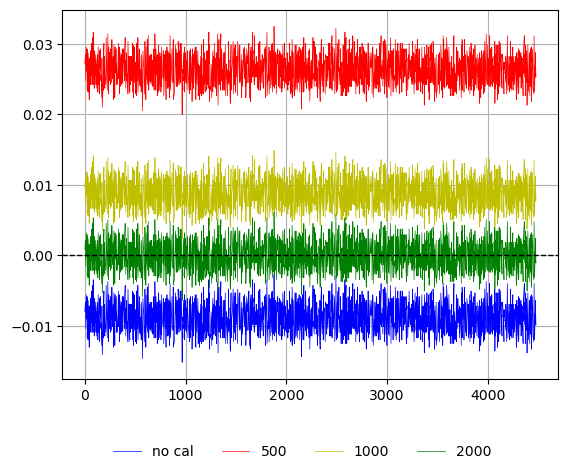

In [50]:
x = np.arange(0, cal["0"].size)
fig, ax = plt.subplots()
ax.plot(x, cal["0"], linewidth=.5, color='b', label='no cal')
ax.plot(x, cal["500"], linewidth=.5, color='r', label='500')
ax.plot(x, cal["1000"], linewidth=.5, color='y', label='1000')
ax.plot(x, cal["2000"], linewidth=.5, color='g', label='2000')

ax.axhline(0, color='black', linewidth=1, linestyle='--')
ax.grid(True)

fig.legend(frameon=False, ncol=4, bbox_to_anchor=(0.5, 0.0), loc='upper center')
fig.savefig('imgs/calibrations.png', bbox_inches='tight')
plt.show()

# Angle estimation with gyroscope

In [43]:
gyro_est = pd.read_csv('gyro_estimate.csv')
gyro_est

,values
0,-0.000004
1,-0.000015
2,-0.000017
3,-0.000019
4,-0.000026
...,...
30484,0.026090
30485,0.026162
30486,0.026159
30487,0.026111


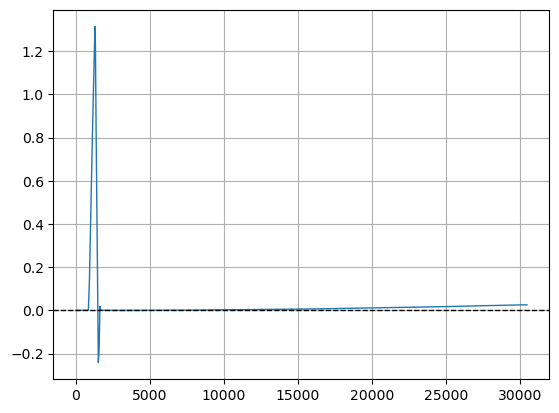

In [84]:
angle_val = gyro_est['values']
x = np.arange(0, angle_val.size)
plt.plot(x, angle_val, linewidth=1)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.grid(True)
plt.savefig('imgs/estimated_roll_angle_gyro.png', bbox_inches='tight')
plt.show()

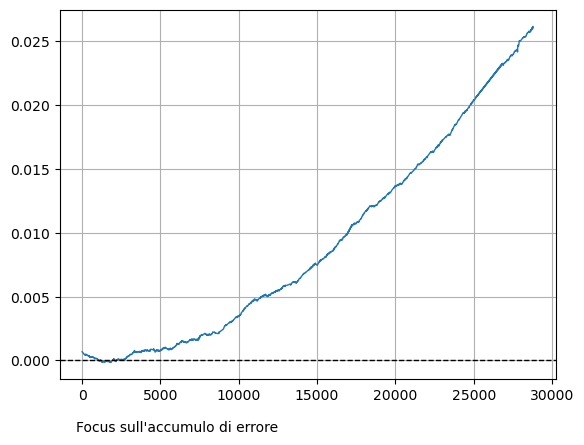

In [85]:
angle_val1 = angle_val[1700:]
x = np.arange(0, angle_val1.size)

fig, ax = plt.subplots()

fig.text(0.15, 0.0, "Focus sull'accumulo di errore")
ax.axhline(0, color='black', linewidth=1, linestyle='--')
ax.grid(True)
fig.savefig('imgs/focused_estimated_roll_angle_gyro.png', bbox_inches='tight')

plt.show()

# Angle estimation with accelerometer

In [98]:
acc = pd.read_csv('roll_acceleration.csv')
acc

,raw,calibrated
0,0.013346,0.000147
1,0.010980,-0.002220
2,0.014405,0.001206
3,0.008293,-0.004906
4,0.010434,-0.002765
...,...,...
3249,0.004560,-0.008639
3250,0.009005,-0.004194
3251,0.005957,-0.007242
3252,0.016972,0.003772


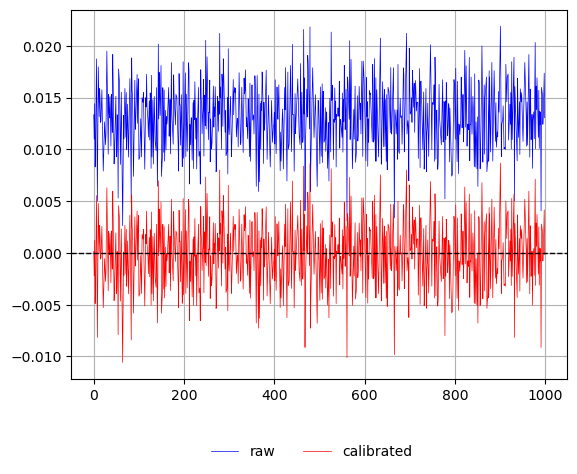

In [109]:
raw = acc['raw'][:1000]
calibrated = acc['calibrated'][:1000]

x = np.arange(0, raw.size)

fig, ax = plt.subplots()

ax.plot(x, raw, linewidth=.5, color='b', label='raw')
ax.plot(x, calibrated, linewidth=.5, color='r', label='calibrated')

ax.axhline(0, color='black', linewidth=1, linestyle='--')
ax.grid(True)

fig.legend(frameon=False, ncol=4, bbox_to_anchor=(0.5, 0.0), loc='upper center')
fig.savefig('imgs/accelerometer_calibrations.png', bbox_inches='tight')
plt.show()

# Angle estimation with complementary filter

In [46]:
compl = pd.read_csv('compl.csv')
compl

,gyro,accel,compl005,compl002,compl05,compl2,compl5
0,-0.000003,-0.001147,-0.000060,-0.000026,-0.000575,-0.002291,-0.005722
1,-0.000016,-0.004953,-0.000317,-0.000137,-0.002770,-0.007602,-0.001823
2,-0.000009,-0.001832,-0.000386,-0.000164,-0.002298,0.003931,-0.001893
3,-0.000001,-0.000491,-0.000384,-0.000163,-0.001390,-0.004921,0.005087
4,-0.000013,-0.003512,-0.000552,-0.000242,-0.002457,-0.002091,-0.037861
...,...,...,...,...,...,...,...
5883,-0.039975,0.002387,-0.000675,-0.000808,0.001105,0.512617,inf
5884,-0.039980,-0.001902,-0.000740,-0.000834,-0.000400,-0.516416,-inf
5885,-0.039983,0.002508,-0.000581,-0.000770,0.001052,0.521435,inf
5886,-0.039990,0.004396,-0.000339,-0.000673,0.002720,-0.512637,-inf


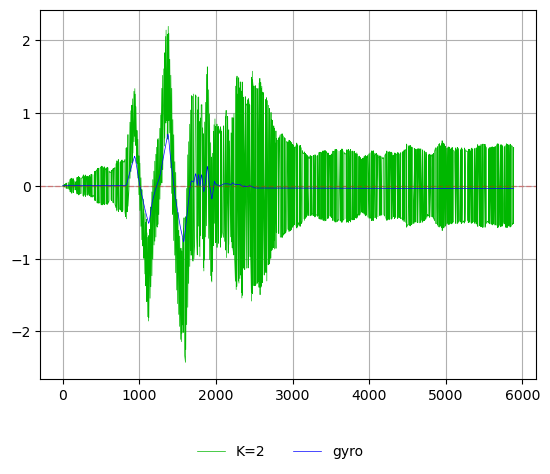

In [91]:
g = compl['gyro']
c2 = compl['compl2']

x = np.arange(0, g.size)

fig, ax = plt.subplots()

ax.plot(x, c2, linewidth=.5, color='#00b700', label='K=2')
ax.plot(x, g, linewidth=.5, color='b', label='gyro')

ax.axhline(0, color='#FF000050', linewidth=1, linestyle='--')
ax.grid(True)

fig.legend(frameon=False, ncol=4, bbox_to_anchor=(0.5, 0.0), loc='upper center')
fig.savefig('imgs/compl2.png', bbox_inches='tight')
plt.show()

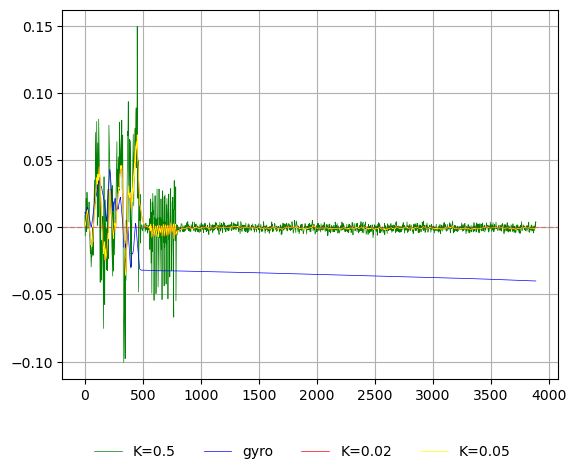

In [105]:
FROM=2000
g = compl['gyro'][FROM:]
c005 = compl['compl005'][FROM:]
c002 = compl['compl005'][FROM:]
c05 = compl['compl05'][FROM:]

x = np.arange(0, g.size)

fig, ax = plt.subplots()

ax.plot(x, c05, linewidth=.5, color='g', label='K=0.5')
ax.plot(x, g, linewidth=.5, color='b', label='gyro')
ax.plot(x, c002, linewidth=.5, color='r', label='K=0.02')
ax.plot(x, c005, linewidth=.5, color='yellow', label='K=0.05')

ax.axhline(0, color='#FF000050', linewidth=1, linestyle='--')
ax.grid(True)

fig.legend(frameon=False, ncol=4, bbox_to_anchor=(0.5, 0.0), loc='upper center')
fig.savefig('imgs/compl05to002.png', bbox_inches='tight')
plt.show()

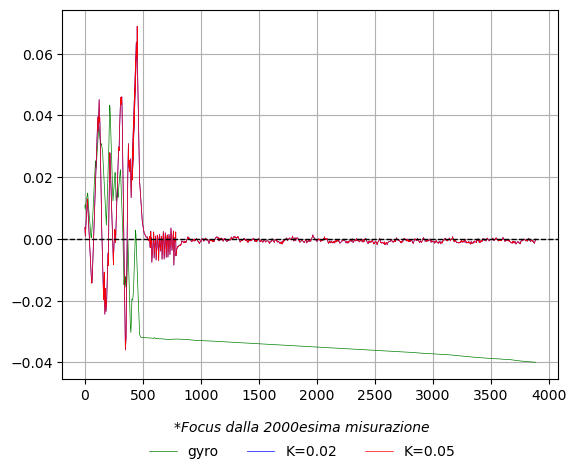

In [122]:
x = np.arange(0, g.size)

fig, ax = plt.subplots()

ax.plot(x, g, linewidth=.5, color='g', label='gyro')
ax.plot(x, c002, linewidth=.5, color='b', label='K=0.02')
ax.plot(x, c005, linewidth=.5, color='r', label='K=0.05')

ax.axhline(0, color='#000000', linewidth=1, linestyle='--')
ax.grid(True)

fig.text(0.3, 0.0, "*Focus dalla 2000esima misurazione", style='italic')
fig.legend(frameon=False, ncol=4, bbox_to_anchor=(0.5, 0.0), loc='upper center')
fig.savefig('imgs/compl002and005.png', bbox_inches='tight')
plt.show()